In [369]:
import pandas as pd
import re

In [370]:
import matplotlib.pyplot as plt

In [371]:
import geopandas
import requests
import json

In [372]:
import os

### Get shapefiles of Arlington, store in "world"

In [373]:
world = geopandas.read_file('../Voter_Precinct_Polygons.shp')

In [374]:
world['PREC_NAME'] = world['PREC_NAME'].apply(lambda x: x.lower())

### Overall turnout by precinct

In [375]:
df = pd.read_csv('../../Downloads/2019 Dem Primary Results - Sheet1.csv',skiprows=2)

In [376]:
df['Precinct']=df['Precinct'].apply(lambda x: re.sub(r"\)|\(|#|-|\d+","",str(x)).lower().strip())

In [377]:
df = world.join(df)

In [378]:
def p2f(x):
    return float(x.strip('%'))

In [379]:
df['Turnout Perc'] = df['Turnout'].apply(lambda x: p2f(str(x)))

In [380]:
df.columns

Index(['OBJECTID', 'PRECINCT', 'HOUSE', 'SENATE', 'PREC_NAME', 'POLLING_PL',
       'ADDRESS', 'LABEL', 'geometry', 'Unnamed: 0', 'Precinct',
       'Election Day Vote', 'Absentee Total', 'Absentee by Mail', 'AIP',
       'Total', 'Active Registered', 'Turnout', '% Absentee', 'Turnout Perc'],
      dtype='object')

In [381]:
df['% Absentee Perc'] = df['% Absentee'].apply(lambda x: p2f(str(x)))

(array([10., 10., 11.,  5.,  9.,  7.,  2.]),
 array([171.        , 280.71428571, 390.42857143, 500.14285714,
        609.85714286, 719.57142857, 829.28571429, 939.        ]),
 <a list of 7 Patch objects>)

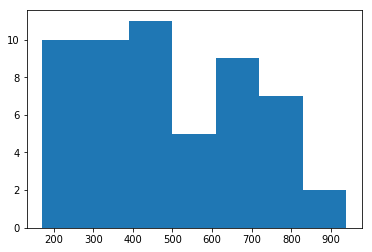

In [382]:
plt.hist(df['Total'], bins='auto')

In [383]:
df.loc[df['PREC_NAME']=='barcroft']

,OBJECTID,PRECINCT,HOUSE,SENATE,PREC_NAME,POLLING_PL,ADDRESS,LABEL,geometry,Unnamed: 0,...,Election Day Vote,Absentee Total,Absentee by Mail,AIP,Total,Active Registered,Turnout,% Absentee,Turnout Perc,% Absentee Perc
21,22,5,47,31,barcroft,Barcroft School,625 S. Wakefield St.,(5) Barcroft,"POLYGON ((11881233.08 7001045.340000004, 11881...",22,...,419.0,29.0,16.0,13.0,448.0,3010.0,14.88%,6.47%,14.88,6.47


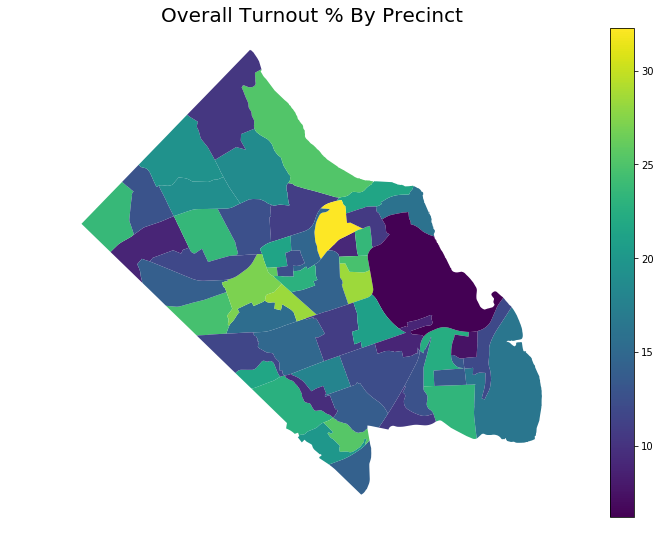

In [384]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Overall Turnout % By Precinct',fontsize=20)
plt.axis('off')
df.plot(column='Turnout Perc',ax=ax,legend=True)

### Bottom 5 Turnout

In [ ]:
df.to

In [497]:
df.sort_values(by='Turnout Perc').head(5)[['Precinct','Turnout']].style.hide_index()

Precinct,Turnout
crystal plaza,6.20%
gunston,7.43%
met park,8.86%
crystal city,8.86%
rosslyn,9.11%


### Top 5 Turnout

In [498]:
df.sort_values(by='Turnout Perc',ascending=False).head(5)[['Precinct','Turnout']].style.hide_index()

Precinct,Turnout
thrifton,32.29%
lexington,28.46%
dominion hills,28.34%
madison,27.19%
nottingham,25.88%


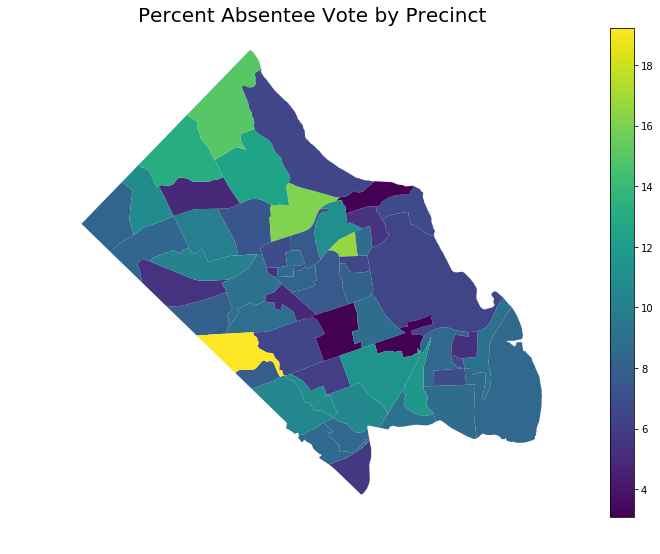

In [387]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Absentee Vote by Precinct',fontsize=20)
plt.axis('off')
df.plot(column='% Absentee Perc',ax=ax,legend=True)

### State Senate Race

In [401]:
senate_json = requests.get('https://results.elections.virginia.gov/vaelections/2019%20June%20Democratic%20Primary/Json/Locality/ARLINGTON%20COUNTY/Member%20House%20of%20Delegates%20(049).json')

senate_dict = {}
senate_dict = json.loads(senate_json.content)

senate_todf = []

In [402]:
senate_dict['Precincts']

[{'PrecinctName': '# AB - Central Absentee Precinct (049)',
  'Candidates': [{'BallotName': 'Alfonso H. Lopez',
    'BallotOrder': 1,
    'Votes': 245,
    'Percentage': '72.06%',
    'PoliticalParty': 'Democratic'},
   {'BallotName': 'Julius D. "JD" Spain, Sr.',
    'BallotOrder': 2,
    'Votes': 95,
    'Percentage': '27.94%',
    'PoliticalParty': 'Democratic'}]},
 {'PrecinctName': '## Provisional (049)',
  'Candidates': [{'BallotName': 'Alfonso H. Lopez',
    'BallotOrder': 1,
    'Votes': 2,
    'Percentage': '50.00%',
    'PoliticalParty': 'Democratic'},
   {'BallotName': 'Julius D. "JD" Spain, Sr.',
    'BallotOrder': 2,
    'Votes': 2,
    'Percentage': '50.00%',
    'PoliticalParty': 'Democratic'}]},
 {'PrecinctName': '001 - ARLINGTON (049)',
  'Candidates': [{'BallotName': 'Alfonso H. Lopez',
    'BallotOrder': 1,
    'Votes': 293,
    'Percentage': '79.62%',
    'PoliticalParty': 'Democratic'},
   {'BallotName': 'Julius D. "JD" Spain, Sr.',
    'BallotOrder': 2,
    'Votes':

In [403]:
for elem in senate_dict['Precincts']:
    #dict("Precinct":elem['PrecinctName'],"Stamos":elem['Candidates'][0]['Votes'],"Parisa":elem['Candidates'][1]['Votes'])
    senate_todf.append({"Precinct":elem['PrecinctName'],"Lopez":elem['Candidates'][0]['Votes'],"Spain":elem['Candidates'][1]['Votes']})

In [391]:
senate_df = pd.DataFrame(senate_todf)

senate_df['Precinct'] = senate_df['Precinct'].apply(lambda x: re.sub(r"\)|\(|#|-|\d+","",x).lower().strip())

In [392]:
senate_df = df.merge(senate_df,left_on='PREC_NAME',right_on='Precinct',how='left')

In [393]:
senate_df.columns

Index(['OBJECTID', 'PRECINCT', 'HOUSE', 'SENATE', 'PREC_NAME', 'POLLING_PL',
       'ADDRESS', 'LABEL', 'geometry', 'Unnamed: 0', 'Precinct_x',
       'Election Day Vote', 'Absentee Total', 'Absentee by Mail', 'AIP',
       'Total', 'Active Registered', 'Turnout', '% Absentee', 'Turnout Perc',
       '% Absentee Perc', 'Lopez', 'Precinct_y', 'Spain'],
      dtype='object')

In [394]:
senate_df['Lopez'] = senate_df['Lopez'].fillna(0)

In [395]:
senate_df['Spain'] = senate_df['Spain'].fillna(0)

In [396]:
senate_df['Lopez Perc'] = (senate_df['Lopez']/senate_df['Active Registered']*100).fillna(0)

In [397]:
senate_df['Spain Perc'] = (senate_df['Spain']/senate_df['Active Registered']*100).fillna(0)

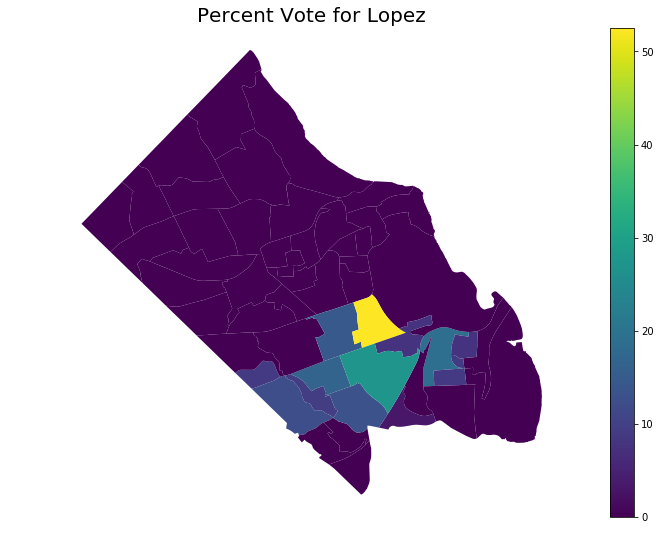

In [398]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Vote for Lopez',fontsize=20)
plt.axis('off')
senate_df.plot(column='Lopez Perc',ax=ax,legend=True,cmap='viridis')

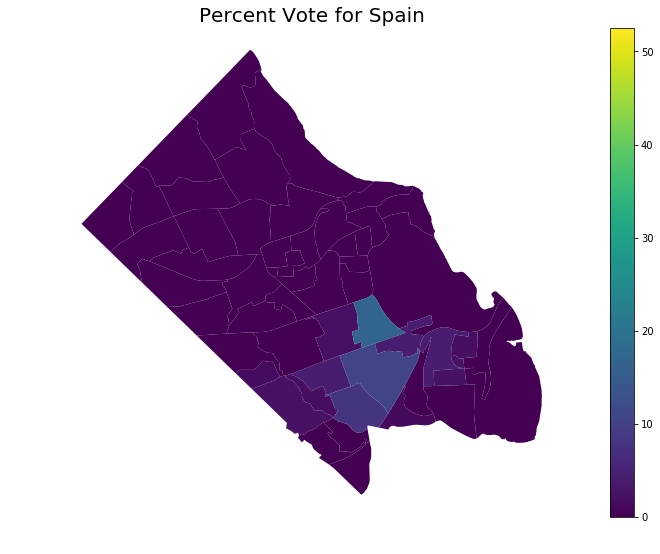

In [399]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Vote for Spain',fontsize=20)
plt.axis('off')
senate_df.plot(column='Spain Perc',ax=ax,legend=True,cmap='viridis',vmin=0,vmax=senate_df['Lopez Perc'].max())

### State Senate- Lopez

In [415]:
senate_json = requests.get('https://results.elections.virginia.gov/vaelections/2019%20June%20Democratic%20Primary/Json/Locality/ARLINGTON%20COUNTY/Member%20Senate%20of%20Virginia%20(031).json')

senate_dict = {}
senate_dict = json.loads(senate_json.content)

senate_todf = []

In [416]:
for elem in senate_dict['Precincts']:
    #dict("Precinct":elem['PrecinctName'],"Stamos":elem['Candidates'][0]['Votes'],"Parisa":elem['Candidates'][1]['Votes'])
    senate_todf.append({"Precinct":elem['PrecinctName'],"Merlene":elem['Candidates'][0]['Votes'],"Favola":elem['Candidates'][1]['Votes']})

In [417]:
senate_df = pd.DataFrame(senate_todf)

senate_df['Precinct'] = senate_df['Precinct'].apply(lambda x: re.sub(r"\)|\(|#|-|\d+","",x).lower().strip())

In [418]:
senate_df = df.merge(senate_df,left_on='PREC_NAME',right_on='Precinct',how='left')

In [419]:
senate_df['senate_diff'] = senate_df['Merlene'] - senate_df['Favola']

In [420]:
senate_df['Favola'] = senate_df['Favola'].fillna(0)

In [421]:
senate_df['Merlene'] = senate_df['Merlene'].fillna(0)

In [422]:
senate_df['Favola Perc'] = (senate_df['Favola']/senate_df['Active Registered']*100).fillna(0)

In [423]:
senate_df['Merlene Perc'] = (senate_df['Merlene']/senate_df['Active Registered']*100).fillna(0)

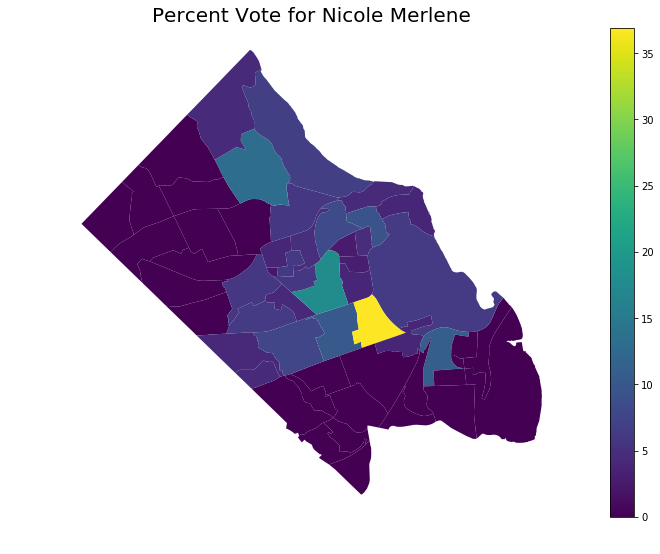

In [426]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Vote for Nicole Merlene',fontsize=20)
plt.axis('off')
senate_df.plot(column='Merlene Perc',ax=ax,legend=True,cmap='viridis')

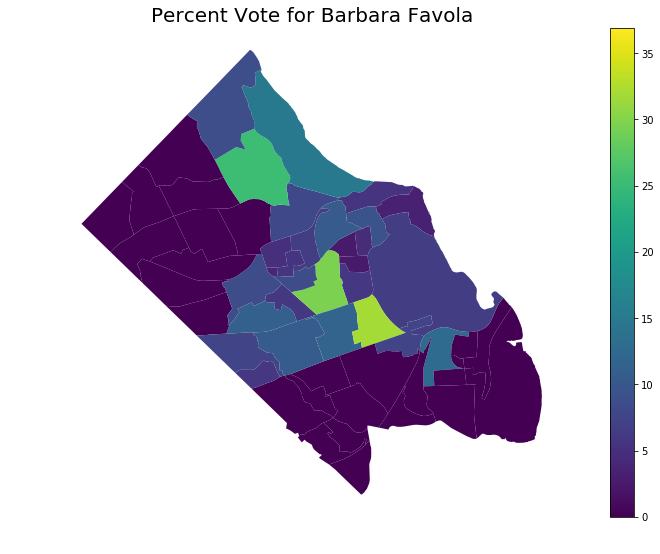

In [428]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Vote for Barbara Favola',fontsize=20)
plt.axis('off')
senate_df.plot(column='Favola Perc',ax=ax,legend=True,cmap='viridis',vmin=0,vmax=senate_df['Merlene Perc'].max())

### Commonwealth Attorney's race

In [466]:
commonwealth_json = requests.get('https://results.elections.virginia.gov/vaelections/2019%20June%20Democratic%20Primary/Json/Locality/ARLINGTON%20COUNTY/Commonwealth\'s%20Attorney%20(ARLINGTON%20COUNTY-FALLS%20CHURCH%20CITY).json')

commonwealth_dict = json.loads(commonwealth_json.content)

commonwealth_todf = []

for elem in commonwealth_dict['Precincts']:
    #dict("Precinct":elem['PrecinctName'],"Stamos":elem['Candidates'][0]['Votes'],"Parisa":elem['Candidates'][1]['Votes'])
    commonwealth_todf.append({"Precinct":elem['PrecinctName'],"Stamos":elem['Candidates'][0]['Votes'],"Parisa":elem['Candidates'][1]['Votes']})

commonwealth_df = pd.DataFrame(commonwealth_todf)

commonwealth_df['Precinct'] = commonwealth_df['Precinct'].apply(lambda x: re.sub(r"-|\d+","",x).lower().strip())

In [468]:
commonwealth_df = df.merge(commonwealth_df,left_on='PREC_NAME',right_on='Precinct',how='left')

In [469]:
commonwealth_df['diff'] = commonwealth_df.Stamos - commonwealth_df.Parisa

In [470]:
commonwealth_df.columns

Index(['OBJECTID', 'PRECINCT', 'HOUSE', 'SENATE', 'PREC_NAME', 'POLLING_PL',
       'ADDRESS', 'LABEL', 'geometry', 'Unnamed: 0', 'Precinct_x',
       'Election Day Vote', 'Absentee Total', 'Absentee by Mail', 'AIP',
       'Total', 'Active Registered', 'Turnout', '% Absentee', 'Turnout Perc',
       '% Absentee Perc', 'Parisa', 'Precinct_y', 'Stamos', 'diff'],
      dtype='object')

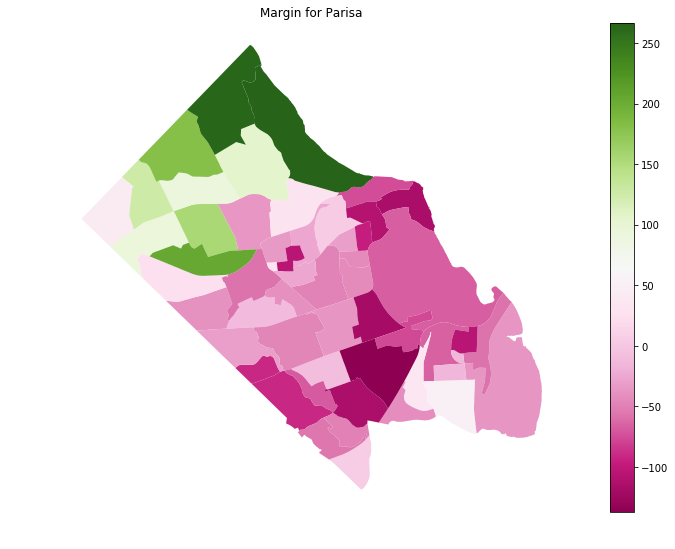

In [471]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Margin for Parisa')
plt.axis('off')
commonwealth_df.plot(column='diff',ax=ax,legend=True,cmap='PiYG')

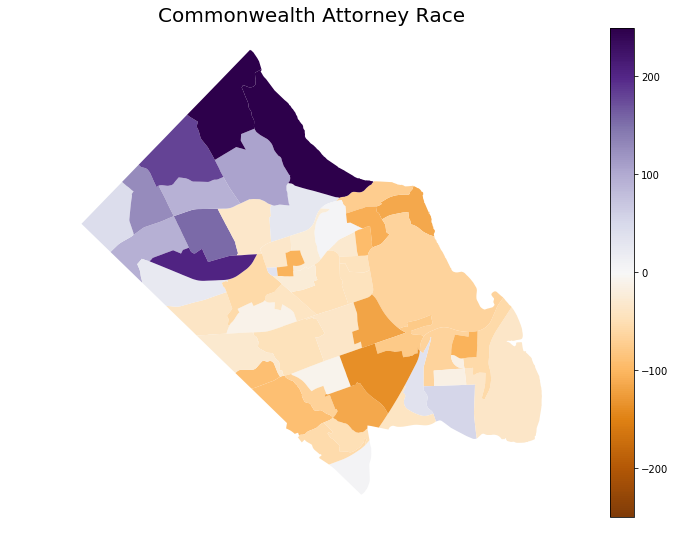

In [473]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Commonwealth Attorney Race',fontsize=20)
plt.axis('off')
commonwealth_df.plot(column='diff',ax=ax,legend=True,cmap='PuOr',vmin=-250,vmax=250)

In [474]:
commonwealth_df['Parisa'] = commonwealth_df['Parisa'].fillna(0)

In [475]:
commonwealth_df['Stamos'] = commonwealth_df['Stamos'].fillna(0)

In [476]:
commonwealth_df['Parisa Perc'] = (commonwealth_df['Parisa']/commonwealth_df['Active Registered']*100).fillna(0)

In [478]:
commonwealth_df['Stamos Perc'] = (commonwealth_df['Stamos']/commonwealth_df['Active Registered']*100).fillna(0)

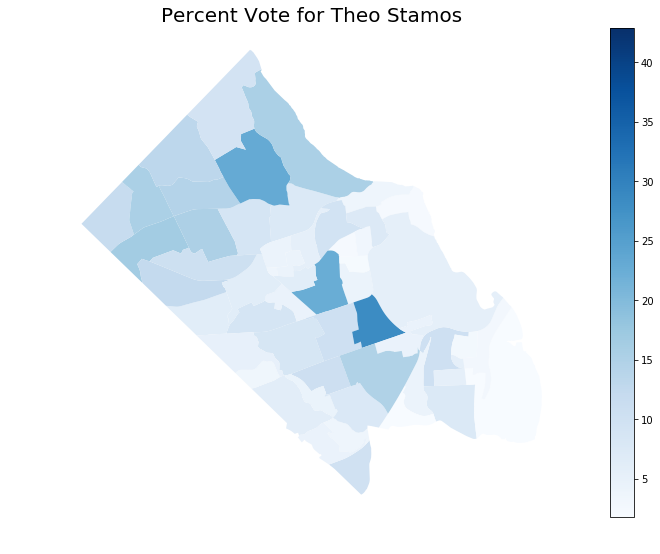

In [485]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Vote for Theo Stamos',fontsize=20)
plt.axis('off')
commonwealth_df.plot(column='Stamos Perc',ax=ax,legend=True,cmap='Blues',vmax=commonwealth_df['Parisa Perc'].max())

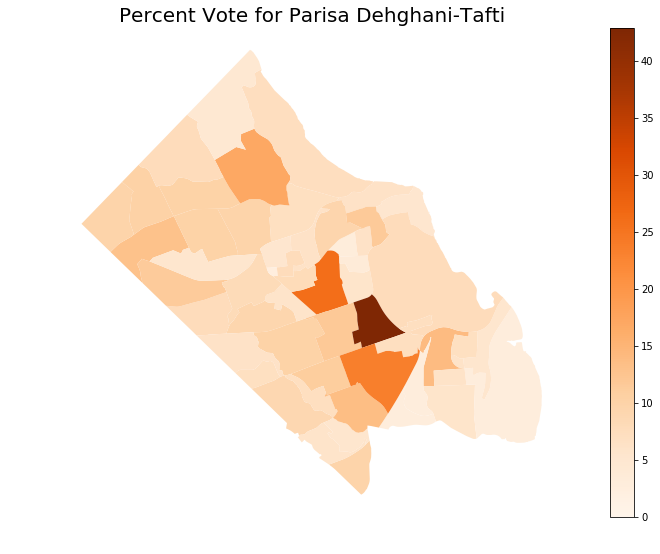

In [486]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('Percent Vote for Parisa Dehghani-Tafti',fontsize=20)
plt.axis('off')
commonwealth_df.plot(column='Parisa Perc',ax=ax,legend=True,cmap='Oranges',vmin=0)

### School Board

In [440]:
schoolboard = pd.read_csv('../../Downloads/Schoolboard Caucus Turnout by precinct - Sheet1.csv'
                            ,skiprows=1,header=None,names=['Precinct','Votes'])

In [441]:
schoolboard.shape

(54, 2)

In [442]:
schoolboard['Precinct'] = schoolboard['Precinct'].apply(lambda x: re.sub(r"\)|\(|#|-|\d+","",str(x)).lower().strip())

In [443]:
schoolboard = df.merge(schoolboard,left_on='Precinct',right_on='Precinct')

In [444]:
schoolboard['Precinct'].loc[~schoolboard['Precinct'].isin(df['Precinct'])]

Series([], Name: Precinct, dtype: object)

In [445]:
schoolboard['School Turnout'] = schoolboard['Votes']/schoolboard['Active Registered']*100

In [446]:
schoolboard.loc[~schoolboard['Precinct'].isin(df['Precinct'])]

,OBJECTID,PRECINCT,HOUSE,SENATE,PREC_NAME,POLLING_PL,ADDRESS,LABEL,geometry,Unnamed: 0,...,Absentee by Mail,AIP,Total,Active Registered,Turnout,% Absentee,Turnout Perc,% Absentee Perc,Votes,School Turnout


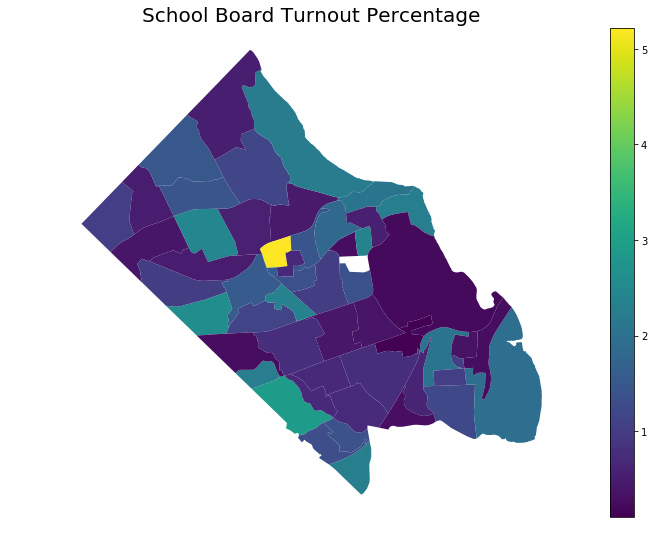

In [449]:
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.set_title('School Board Turnout Percentage',fontsize=20)
plt.axis('off')
schoolboard.plot(column='School Turnout',ax=ax,legend=True)